In [1]:
library(igraph)
#Question_11
g <- read.graph('sID_dID_time_only.txt', format="ncol", directed=TRUE)
index_to_node_id = vertex_attr(g)[[1]]
class(index_to_node_id) <- "numeric"





Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
edge_time_dist <- read.table('sID_dID_time_dist.txt')
edge_no_time <- read.table('edgeNotime.txt')
time_dist <- matrix(-1, nrow = dim(edge_no_time)[1], ncol = 2)
edge_no_time_extend <- cbind(data.matrix(edge_no_time), time_dist)

for (i in c(1:dim(edge_no_time)[1])){
  node_id = edge_no_time[i,1:2]
  idx_graph = match(node_id, index_to_node_id) 
  if ((is.na(idx_graph[1]) | is.na(idx_graph[2])) ==1 ){
    next
  }
  time_minimum = distances(g, idx_graph[1], to = idx_graph[2], mode = 'out',
                       weights = E(g)$weight)
  if (time_minimum < 100000){
    edge_no_time_extend[i,3] = time_minimum 
    short_path = all_shortest_paths(g, from = idx_graph[1], to = idx_graph[2], mode = 'out',
                                    weights = E(g)$weight)$res[[1]] 
    cnt = 0
    for(j in c(1:(length(short_path) - 1))){
      temp_pair <- short_path[j:(j+1)]
      temp_pair <- as.numeric(temp_pair) 
      node_id_pair <- index_to_node_id[temp_pair] 
      for (k in c(1: dim(edge_time_dist)[1]))
        if (all(node_id_pair == c(edge_time_dist[k,1], edge_time_dist[k,2]))){
          cnt = cnt + edge_time_dist[k,4]
          #print(k)
          break
        }
    }
    edge_no_time_extend[i,4] = cnt
  }
  print(i)
}



[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1] 140
[1

In [3]:
i_s =c()
for (i in c(1:dim(edge_no_time_extend)[1])){
  if (edge_no_time_extend[i,3] > 0){
  i_s <- c(i_s, i)
  }
}
df_temp <- edge_no_time_extend[i_s, ]
edge_time_dist_new <- rbind(edge_time_dist, df_temp)
edge_time_only_new <- edge_time_dist_new[,1:3]



In [7]:
write.table(edge_time_dist_new,"edge_time_dist.txt",sep="\t",row.names=FALSE, col.names = FALSE)

In [5]:
write.table(edge_time_only_new, "edge_time_only.txt",sep="\t",row.names=FALSE)
g_11 <- read.graph('edge_time_only.txt', format="ncol", directed=TRUE)
index_to_node_id_2 = vertex_attr(g_11)[[1]]
class(index_to_node_id_2) <- "numeric"
idx_graph <- match(2607, index_to_node_id_2)
nei <- neighbors(g_11, idx_graph, mode = c("out"))
index_to_node_id_2[nei]



Warning message in class(idx2nodeID2) <- "numeric":
“NAs introduced by coercion”

[1] 2240 1363 1726 2378 1725 1736

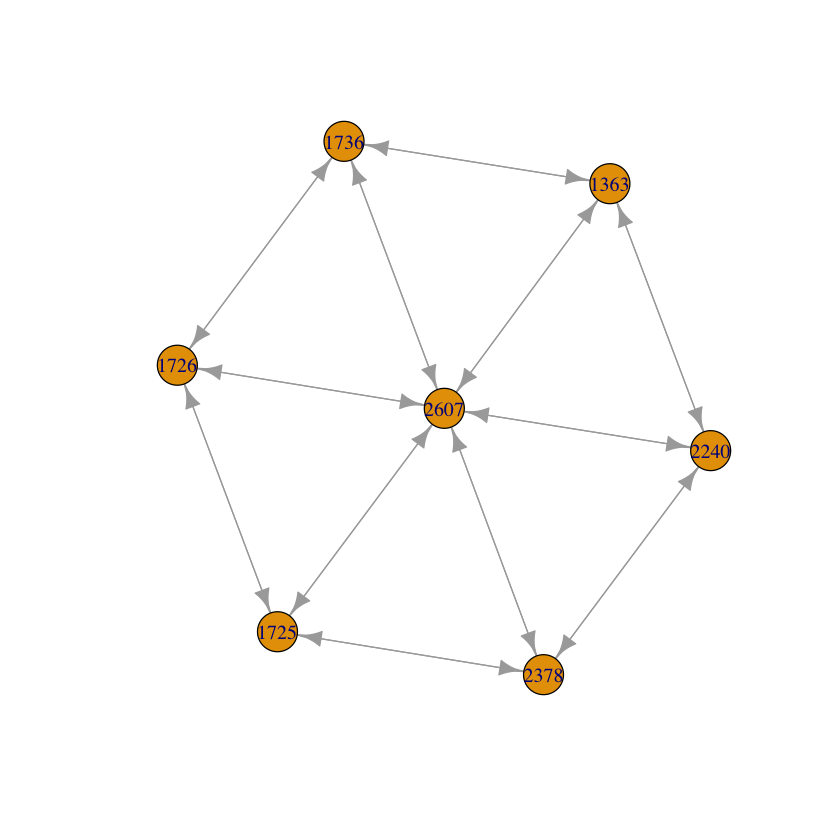

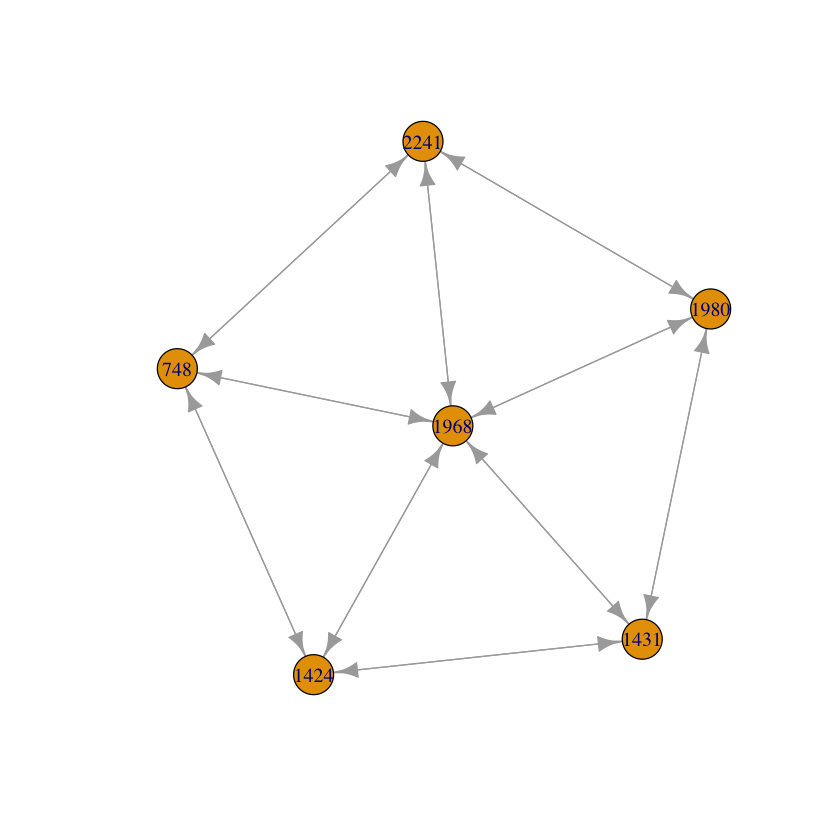

In [16]:
#Question_13
tabletemp <- read.table('q13_flow.txt')
colnames(tabletemp) <- c("from", "to", "capacity")
g_12 <- graph_from_data_frame(as.data.frame(tabletemp))
index_to_node_id_3 = vertex_attr(g_12)[[1]]
class(index_to_node_id_3) <- "numeric"
idx_g1 <- match(2607, index_to_node_id_3)
idx_g2 <- match(1968, index_to_node_id_3) 
maximum_cars = max_flow(g_12, source=idx_g1, target=idx_g2, capacity = NULL)$value
plot(make_ego_graph(g_12, 1, nodes = idx_g1, mode = 'out',mindist = 0)[[1]])
plot(make_ego_graph(g_12, 1, nodes = idx_g2, mode = 'in',mindist = 0)[[1]])



In [20]:
edge_disjoint_paths(g_12, idx_g1, idx_g2)

[1] 5

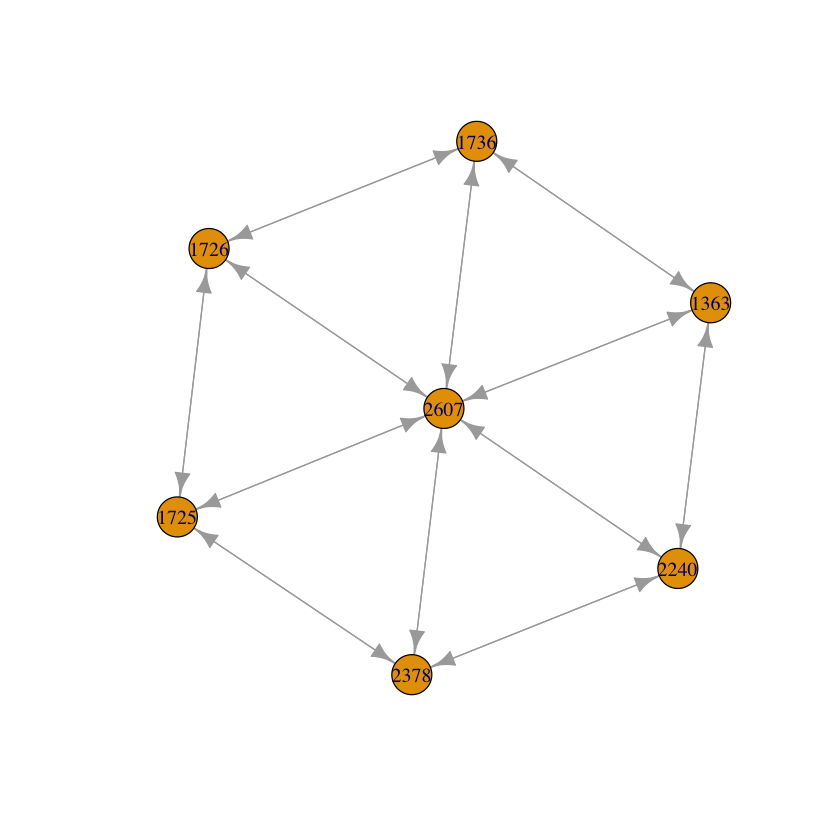

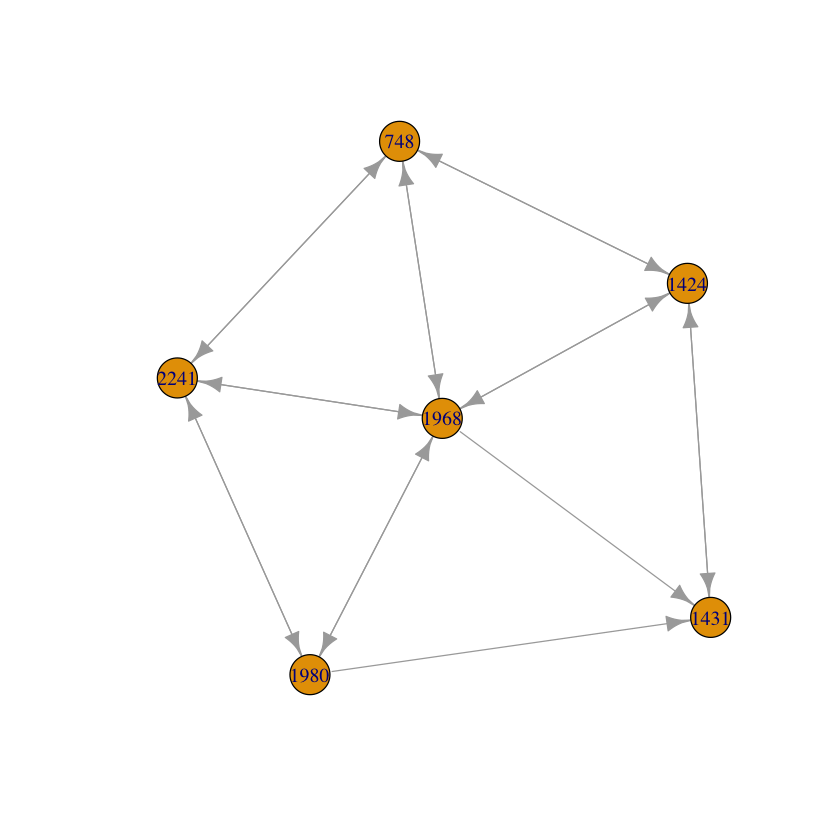

In [18]:
#Question_15
tabletemp1 <- read.table('q15_flow.txt')
colnames(tabletemp1) <- c("from", "to", "capacity")
g_15 <- graph_from_data_frame(as.data.frame(tabletemp1))
index_to_node_id_4 = vertex_attr(g_15)[[1]]
class(index_to_node_id_4) <- "numeric"
idx_g1 <- match(2607, index_to_node_id_4) 
idx_g2 <- match(1968, index_to_node_id_4) 
maximum_cars = max_flow(g_15, source=idx_g1, target=idx_g2, capacity = NULL)$value #12062
plot(make_ego_graph(g_15, 1, nodes = idx_g1, mode = 'all', mindist = 0)[[1]])
plot(make_ego_graph(g_15, 1, nodes = idx_g2, mode = 'all', mindist = 0)[[1]])


In [19]:
edge_disjoint_paths(g_15, idx_g1, idx_g2)

[1] 4